# Import Packages + Data brut

In [43]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
import os

# Ajoute le chemin du dossier parent à sys.path
notebook_dir = os.path.abspath('..')  # Dossier parent de "notebook/"
sys.path.append(notebook_dir)

from fonctions.importation import *
from fonctions.traitement_data import *

import warnings
warnings.filterwarnings("ignore")

In [44]:
#df = etl(r"C:\Users\theol\Desktop\Projet_MLOPS\data")

In [45]:
df = pd.read_csv(r'..\data\NY-House-Dataset.csv')
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# Analyse Data bruts

In [46]:
# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

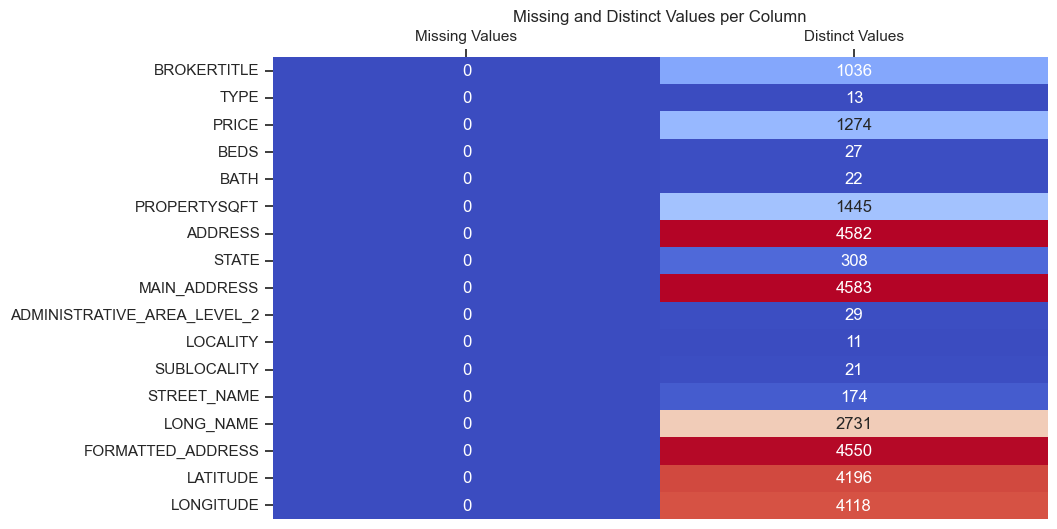

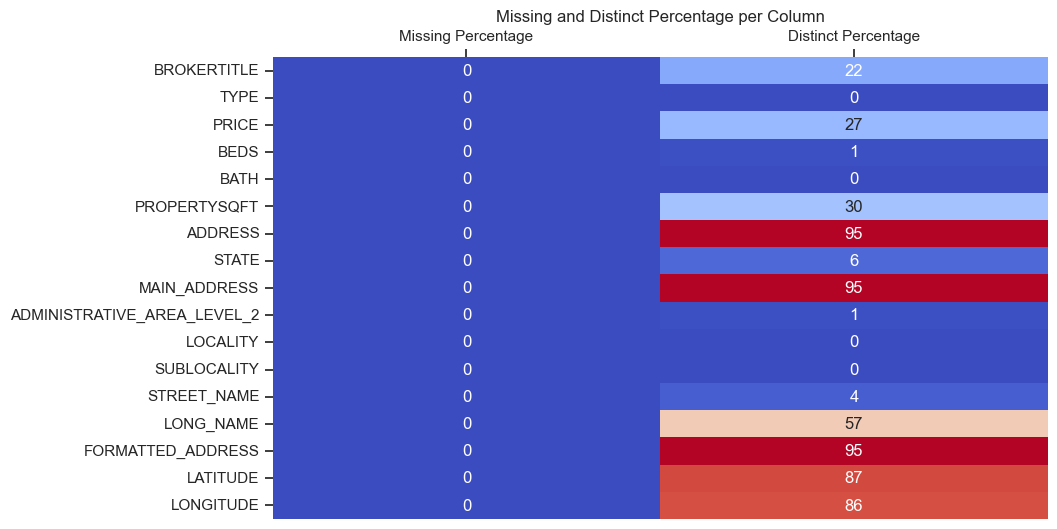

In [47]:
analyze_and_plot(df)

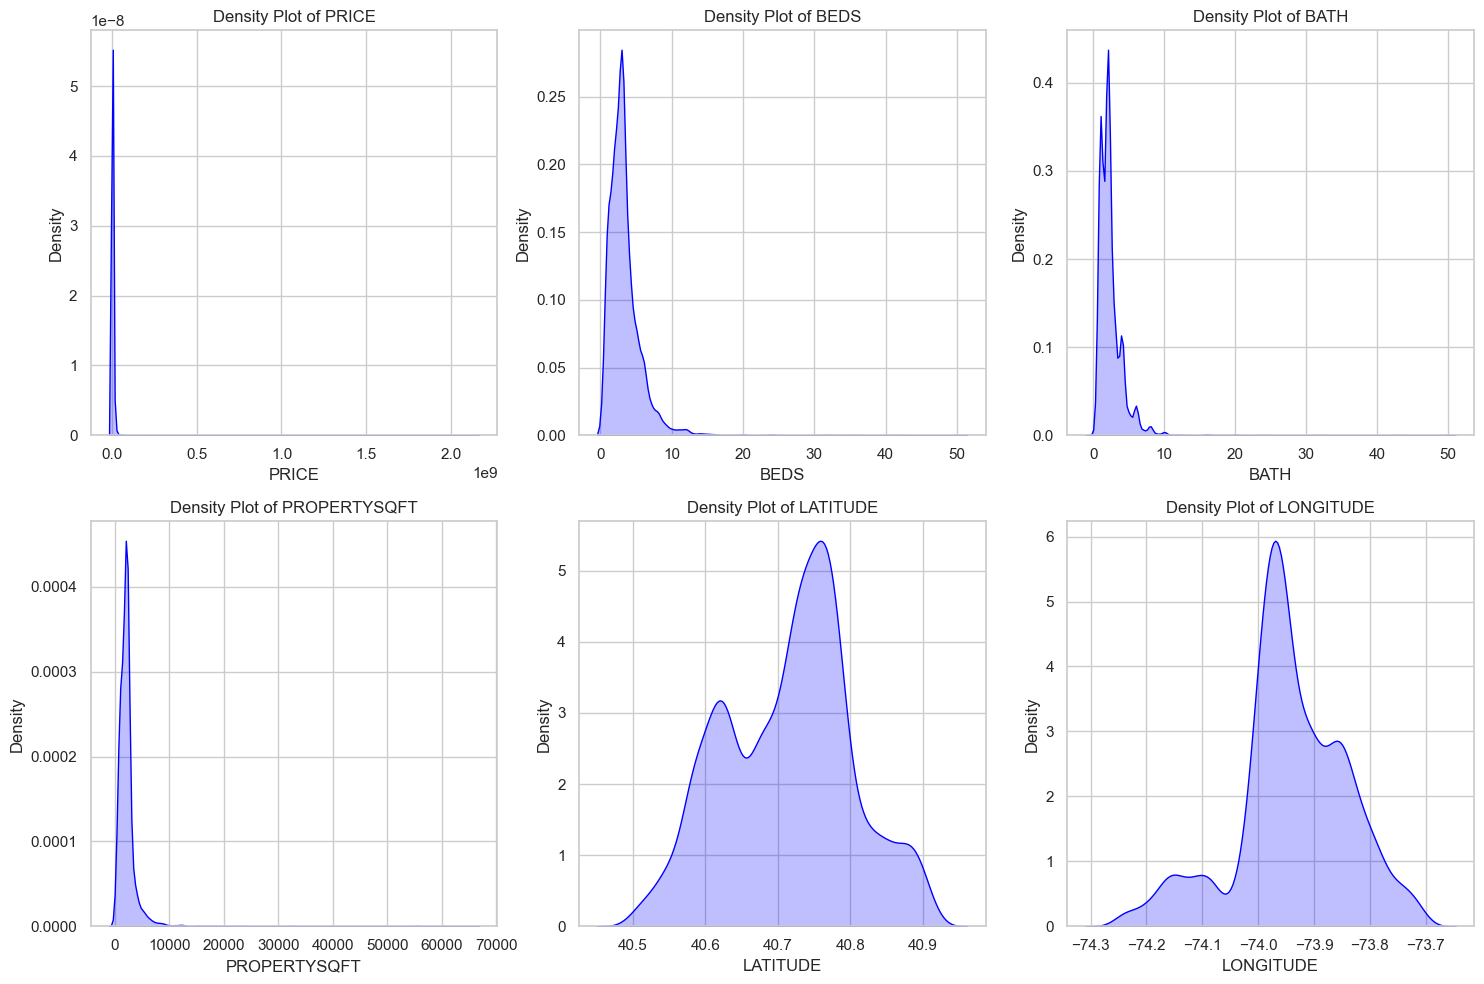

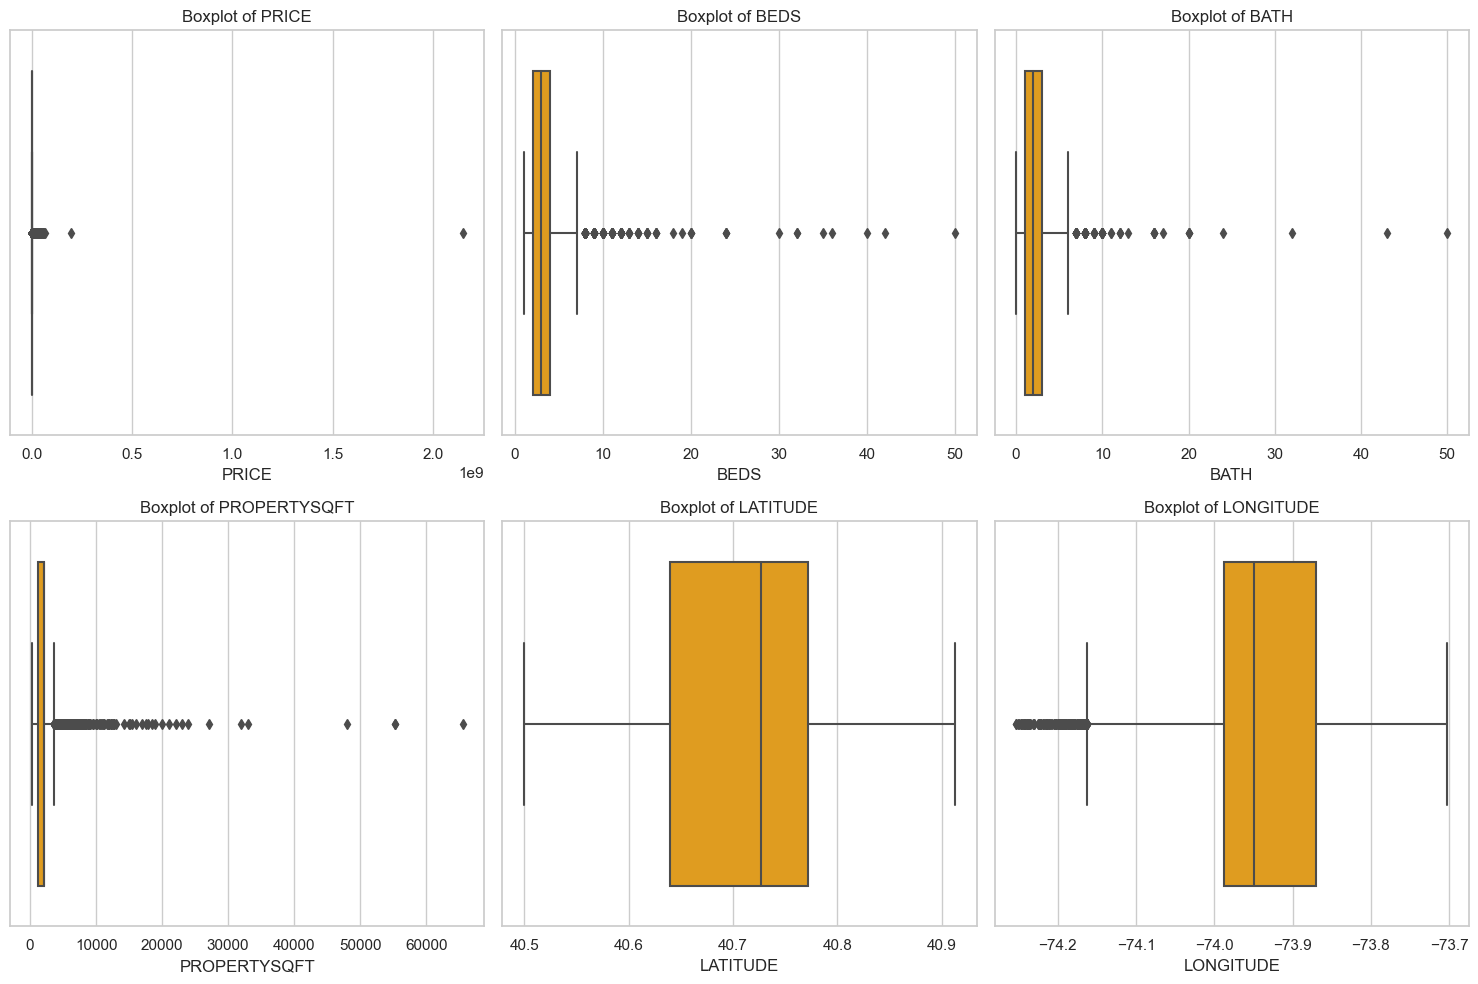

In [48]:
# Configuration de l'affichage
sns.set(style="whitegrid")
# Calcul du nombre de lignes et de colonnes pour le sous-graphique
num_cols = 3  # Par exemple, on fixe 3 colonnes
num_rows = math.ceil(len(numeric_columns) / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Création de graphiques pour chaque colonne numérique avec courbe de densité
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boîtes à moustaches pour les mêmes colonnes
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Traitement Data

In [49]:
df_clean = df.copy()
df_clean = df_clean.drop(['BROKERTITLE','ADDRESS', 'MAIN_ADDRESS','FORMATTED_ADDRESS'], axis=1)

In [50]:
# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Analyse Data Post-Traitement

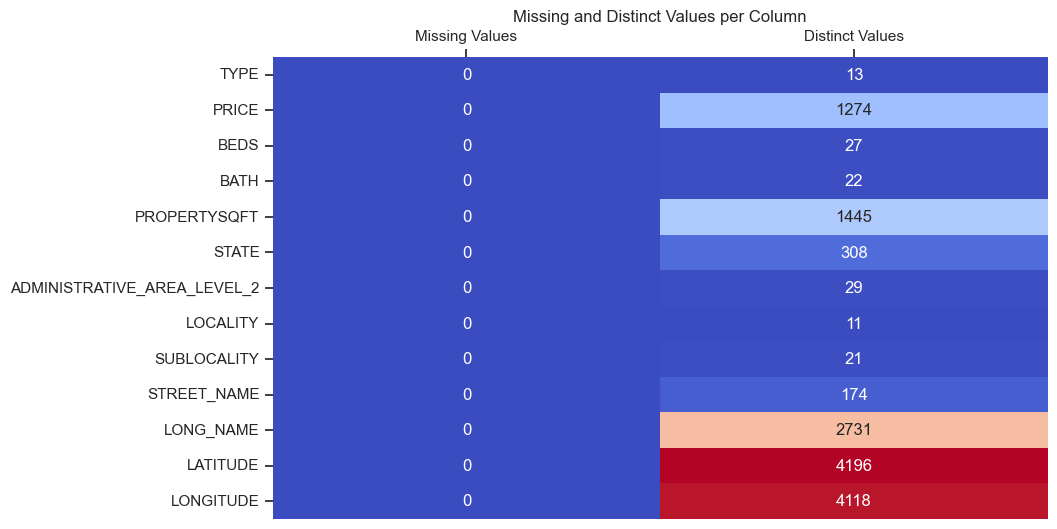

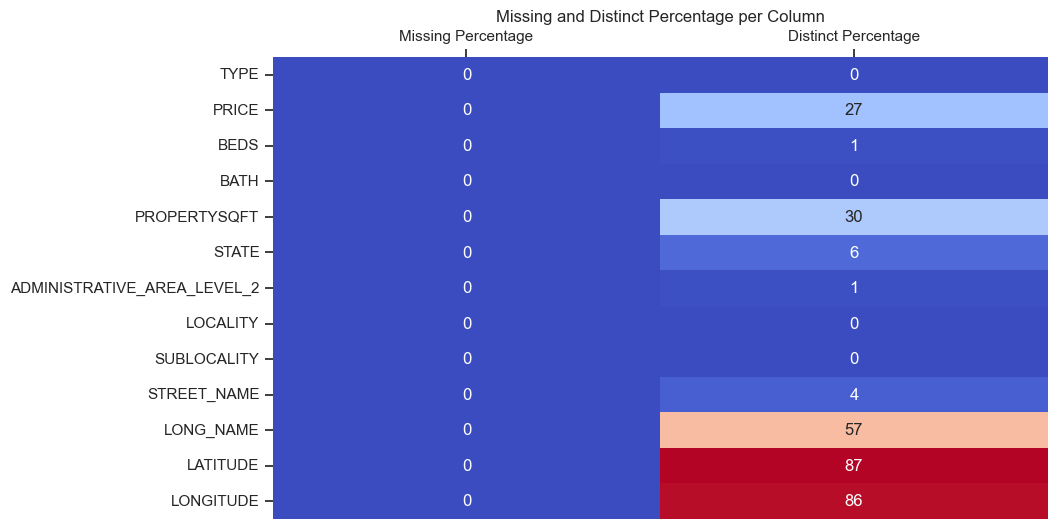

In [51]:
analyze_and_plot(df_clean)

BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
                                                ... 
Brokered by Gerard R Desgranges                    1
Brokered by Property Professional Realty           1
Brokered by Mark Murphy Properties                 1
Brokered by S Sharf Realty Inc                     1
Brokered by New York Way Real Estate Corp          1
Name: count, Length: 1036, dtype: int64


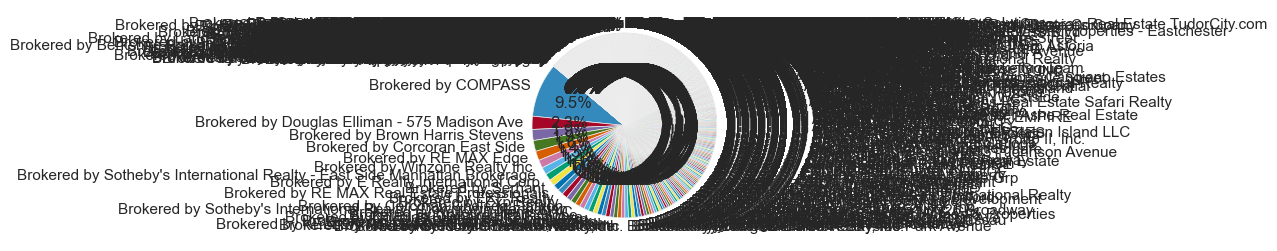

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


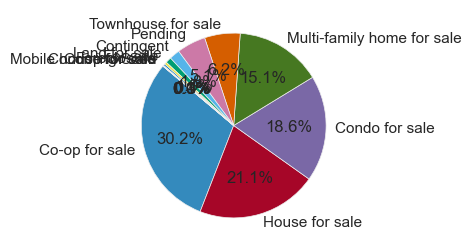

ADDRESS
2619 Shore Pkwy              3
856 Washington Ave Apt 6C    3
595 Van Buren St             2
2217 Gunther Ave             2
18 E 63rd St Apt 9           2
                            ..
579 W 215th St Apt 9D        1
150-123 Powells Cove Blvd    1
47 Wheeler Ave               1
966 Clove Rd Unit H1         1
460 Neptune Ave Apt 14O      1
Name: count, Length: 4582, dtype: int64


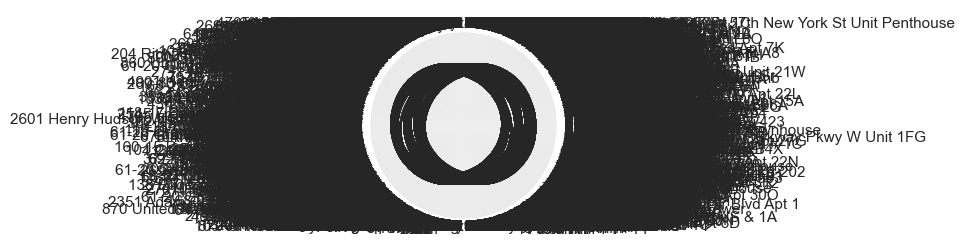

STATE
Brooklyn, NY 11235            102
Brooklyn, NY 11209             94
Forest Hills, NY 11375         91
Brooklyn, NY 11234             90
Staten Island, NY 10314        86
                             ... 
Queens, NY 11427                1
Queens, NY 11429                1
Long Island City, NY 11109      1
Brooklyn, NY 11694              1
Ozone Park, NY 11416            1
Name: count, Length: 308, dtype: int64


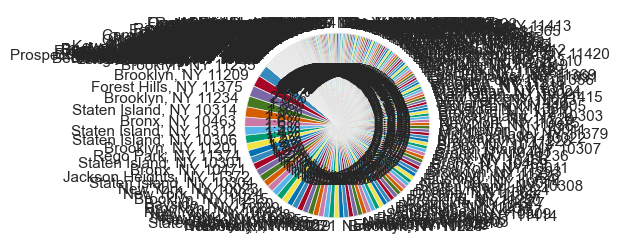

MAIN_ADDRESS
2619 Shore PkwyBrooklyn, NY 11223                3
856 Washington Ave Apt 6CBrooklyn, NY 11238      3
595 Van Buren StBrooklyn, NY 11221               2
2217 Gunther AveBronx, NY 10469                  2
18 E 63rd St Apt 9Manhattan, NY 10065            2
                                                ..
86-02 Dumont Ave Unit 1BOzone Park, NY 11417     1
579 W 215th St Apt 9DNew York, NY 10034          1
150-123 Powells Cove BlvdWhitestone, NY 11357    1
47 Wheeler AveStaten Island, NY 10314            1
460 Neptune Ave Apt 14OBrooklyn, NY 11224        1
Name: count, Length: 4583, dtype: int64


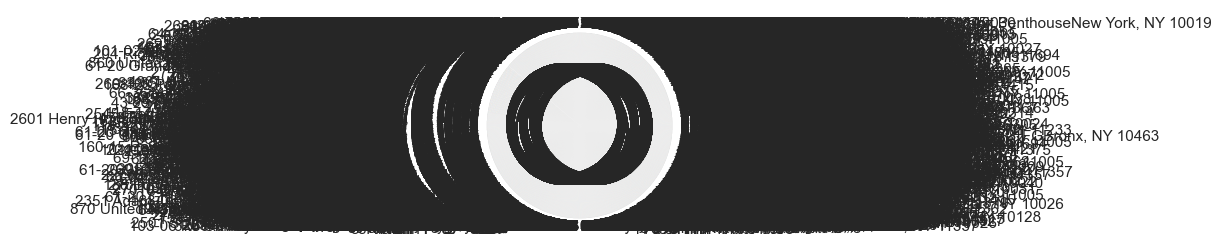

ADMINISTRATIVE_AREA_LEVEL_2
United States      2484
New York           2241
New York County      21
11214                 8
Queens County         6
Kings County          6
Bronx County          5
11229                 3
10017                 2
10310                 2
10003                 2
10002                 2
10306                 2
10471                 2
11237                 1
10466                 1
Brooklyn              1
10465                 1
11412                 1
10312                 1
10309                 1
10303                 1
10463                 1
10301                 1
10304                 1
11417                 1
11414                 1
11234                 1
11218                 1
Name: count, dtype: int64


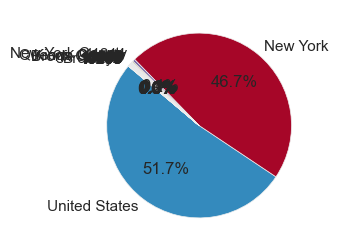

LOCALITY
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64


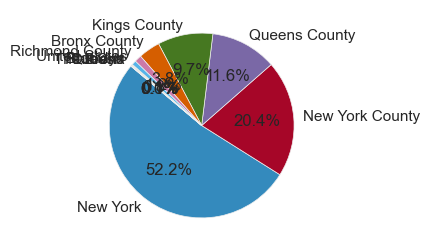

SUBLOCALITY
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Riverdale              4
Flushing               4
Coney Island           3
East Bronx             1
Brooklyn Heights       1
Jackson Heights        1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64


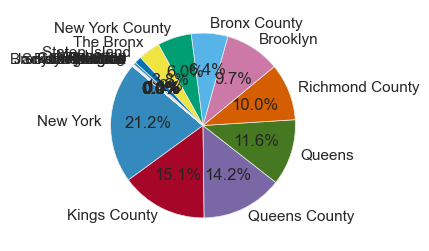

STREET_NAME
Manhattan           979
Brooklyn            727
Queens              684
Staten Island       480
The Bronx           310
                   ... 
Rector Place          1
Centre Street         1
East 96th Street      1
35th Avenue           1
Mount Eden            1
Name: count, Length: 174, dtype: int64


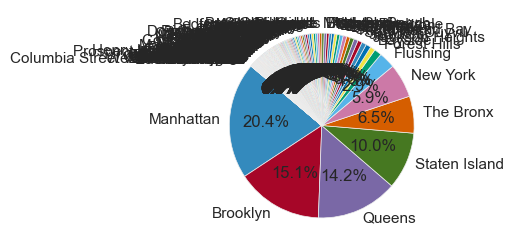

LONG_NAME
2                         20
200                       19
100                       19
40                        16
Amboy Road                15
                          ..
Powells Cove Boulevard     1
579                        1
86-2                       1
36th Avenue                1
2351                       1
Name: count, Length: 2731, dtype: int64


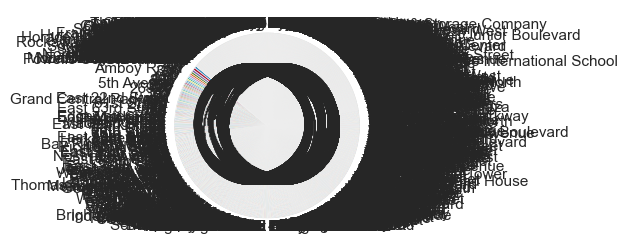

FORMATTED_ADDRESS
61-20 Grand Central Pkwy, Forest Hills, NY 11375, USA    4
856 Washington Ave #6c, Brooklyn, NY 11238, USA          3
39 W 23rd St, New York, NY 10010, USA                    3
218 W 103rd St, New York, NY 10025, USA                  3
46 Laight St, New York, NY 10013, USA                    3
                                                        ..
134-25 241st St, Jamaica, NY 11422, USA                  1
86-2 Dumont Ave #1b, Ozone Park, NY 11417, USA           1
579 W 215th St #9d, New York, NY 10034, USA              1
150-123 Powells Cove Blvd, Whitestone, NY 11357, USA     1
460 Neptune Ave #14a, Brooklyn, NY 11224, USA            1
Name: count, Length: 4550, dtype: int64


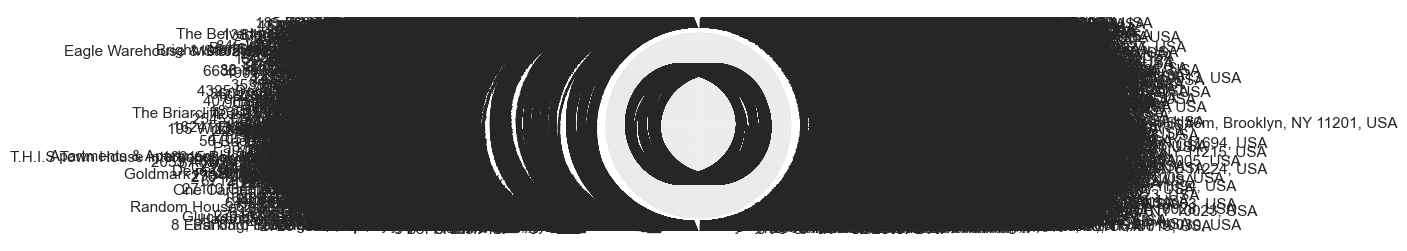

In [52]:
for column in non_numeric_columns :
    plt.style.use("bmh")
    prop_mod_cah = df[column].value_counts() # Calcul les proportions d'appartitions des modalités dans la variable
    print(prop_mod_cah)
    plt.figure(figsize=(3, 3))
    plt.pie(prop_mod_cah, labels=prop_mod_cah.index, autopct='%1.1f%%', startangle=140)
    plt.show()